<a href="https://colab.research.google.com/github/rhama9/IDS-THESIS/blob/main/ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import essential libraries
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For nicer visualizations
from sklearn.preprocessing import LabelEncoder  # For converting text to numbers

# Confirm setup
print("Libraries imported successfully!")# Import essential libraries
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For nicer visualizations
from sklearn.preprocessing import LabelEncoder  # For converting text to numbers

# Confirm setup
print("Libraries imported successfully!")

Libraries imported successfully!
Libraries imported successfully!


In [6]:
# Import libraries (already done)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the training dataset
train_data = pd.read_csv('KDDTrain+.txt', header=None)

# Define column names (41 features + label + extra column)
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

# Assign column names
train_data.columns = columns

# Drop the 'difficulty' column (not needed for now)
train_data = train_data.drop('difficulty', axis=1)

# Check the first 5 rows
print("First 5 rows of the dataset:")
print(train_data.head())

# Check the shape (should now be 42 columns)
print("\nDataset shape:", train_data.shape)

First 5 rows of the dataset:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.1

Label distribution:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


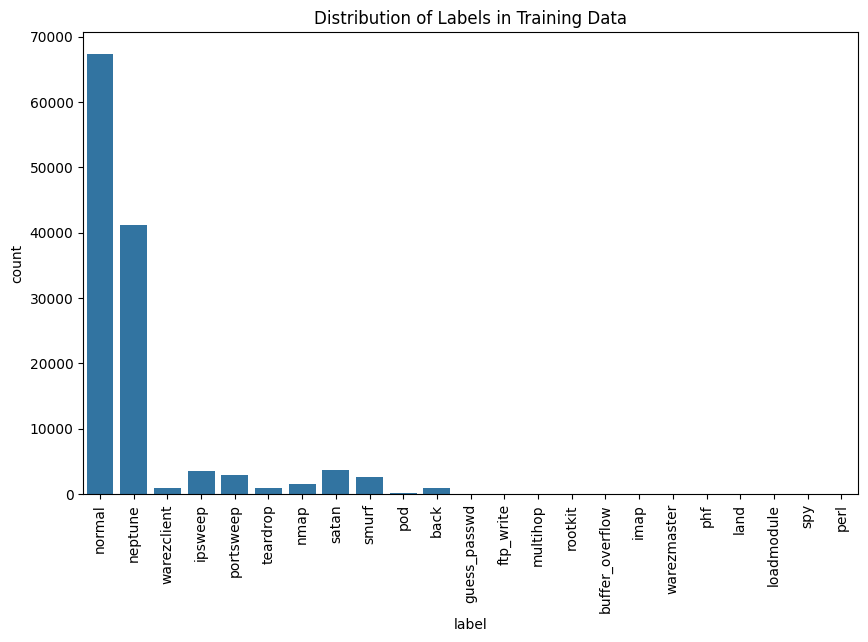

In [7]:
# Count normal vs attack instances
label_counts = train_data['label'].value_counts()
print("Label distribution:")
print(label_counts)

# Plot it
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_data)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Distribution of Labels in Training Data")
plt.show()

In [8]:
# Show data types and a few examples
print("Data types and sample values:")
print(train_data.dtypes)
print("\nFirst row sample:")
print(train_data.iloc[0])

Data types and sample values:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    flo

In [9]:
# Load and explore (condensed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
train_data = pd.read_csv('KDDTrain+.txt', header=None)
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]
train_data.columns = columns
train_data = train_data.drop('difficulty', axis=1)

# First 5 rows
print("First 5 rows of the dataset:")
print(train_data.head())

# Label distribution (you already shared this)
label_counts = train_data['label'].value_counts()
print("\nLabel distribution:")
print(label_counts)

# Percentages
normal_count = label_counts.get('normal', 0)
attack_count = len(train_data) - normal_count
print(f"\nNormal: {normal_count} ({normal_count/len(train_data)*100:.2f}%)")
print(f"Attacks: {attack_count} ({attack_count/len(train_data)*100:.2f}%)")

First 5 rows of the dataset:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.1

Class Imbalance: normal is the majority, but neptune (DoS attack) is huge among attacks. Rare attacks (<10 instances) may be hard to detect individually, so we’ll treat all attacks as “anomalies” vs. normal.



First 5 rows of the dataset:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.1

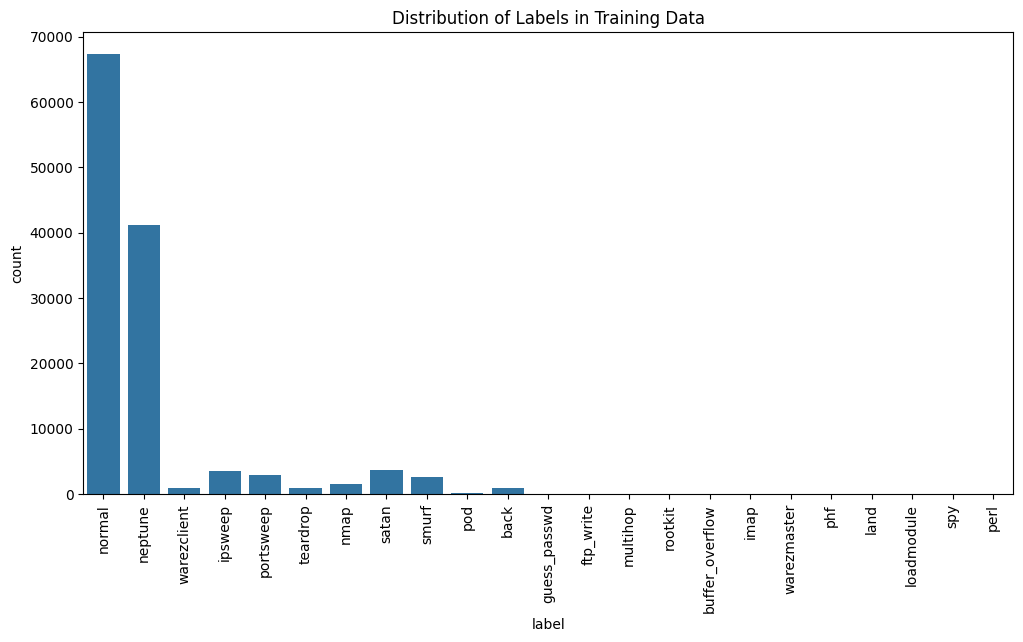


Normal: 67343 (53.46%)
Attacks: 58630 (46.54%)

Data types:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
ser

In [10]:
# Import libraries (already done)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the training dataset
train_data = pd.read_csv('KDDTrain+.txt', header=None)

# Define column names (41 features + label + extra column)
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

# Assign column names and drop difficulty
train_data.columns = columns
train_data = train_data.drop('difficulty', axis=1)

# Check the first 5 rows
print("First 5 rows of the dataset:")
print(train_data.head())

# Check the shape
print("\nDataset shape:", train_data.shape)

# Label distribution
label_counts = train_data['label'].value_counts()
print("\nLabel distribution:")
print(label_counts)

# Plot it
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=train_data)
plt.xticks(rotation=90)
plt.title("Distribution of Labels in Training Data")
plt.show()

# Percentages
normal_count = label_counts.get('normal', 0)
attack_count = len(train_data) - normal_count
print(f"\nNormal: {normal_count} ({normal_count/len(train_data)*100:.2f}%)")
print(f"Attacks: {attack_count} ({attack_count/len(train_data)*100:.2f}%)")

# Data types
print("\nData types:")
print(train_data.dtypes)

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# 1. Encode categorical features
le = LabelEncoder()
for column in ['protocol_type', 'service', 'flag']:
    train_data[column] = le.fit_transform(train_data[column])

# 2. Convert labels to binary (normal=0, attack=1)
train_data['label_binary'] = train_data['label'].apply(lambda x: 0 if x == 'normal' else 1)

# 3. Separate features and labels
X = train_data.drop(['label', 'label_binary'], axis=1)  # Features (41 columns)
y = train_data['label_binary']  # Binary labels

# 4. Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify (optional, uncomment if you want to check)
# print("First 5 rows of X_scaled:", X_scaled[:5])
# print("Shape of X_scaled:", X_scaled.shape)
# print("First 5 binary labels:", y.head())
# print("Binary label distribution:", y.value_counts())

In [14]:
# Import Isolation Forest
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.465, random_state=42, n_estimators=100)

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred = iso_forest.predict(X_scaled)

# Convert predictions to match our labels (0 = normal, 1 = anomaly)
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     67343
           1       0.58      0.58      0.58     58630

    accuracy                           0.60    125973
   macro avg       0.60      0.60      0.60    125973
weighted avg       0.60      0.60      0.60    125973


Confusion Matrix:
[[42479 24864]
 [24917 33713]]


In [15]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Added StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Load the training dataset
train_data = pd.read_csv('KDDTrain+.txt', header=None)

# Define column names (41 features + label + difficulty)
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

# Assign columns and drop difficulty
train_data.columns = columns
train_data = train_data.drop('difficulty', axis=1)

# 1. Encode categorical features
le = LabelEncoder()
for column in ['protocol_type', 'service', 'flag']:
    train_data[column] = le.fit_transform(train_data[column])

# 2. Convert labels to binary (normal=0, attack=1)
train_data['label_binary'] = train_data['label'].apply(lambda x: 0 if x == 'normal' else 1)

# 3. Separate features and labels
X = train_data.drop(['label', 'label_binary'], axis=1)  # Features (41 columns)
y = train_data['label_binary']  # Binary labels

# 4. Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Build Isolation Forest
iso_forest = IsolationForest(contamination=0.465, random_state=42, n_estimators=100)
iso_forest.fit(X_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred = iso_forest.predict(X_scaled)

# Convert predictions to match our labels (0 = normal, 1 = anomaly)
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Evaluate
print("Classification Report:")
print(classification_report(y, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     67343
           1       0.58      0.58      0.58     58630

    accuracy                           0.60    125973
   macro avg       0.60      0.60      0.60    125973
weighted avg       0.60      0.60      0.60    125973


Confusion Matrix:
[[42479 24864]
 [24917 33713]]


In [16]:
# Get anomaly scores (negative = more anomalous)
anomaly_scores = iso_forest.decision_function(X_scaled)

# Normalize scores to 0-1 range (higher = riskier)
risk_scores = (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min())
risk_scores = 1 - risk_scores  # Flip so 1 = highest risk

# Combine predictions, actual labels, and scores
results = pd.DataFrame({
    'True_Label': y,
    'Predicted': y_pred,
    'Risk_Score': risk_scores
})

# Show top 5 anomalies by risk score
print("\nTop 5 anomalies by risk score:")
print(results[results['Predicted'] == 1].sort_values('Risk_Score', ascending=False).head())


Top 5 anomalies by risk score:
       True_Label  Predicted  Risk_Score
64288           0          1    1.000000
53128           0          1    0.993324
25095           1          1    0.989840
80967           0          1    0.986150
87054           0          1    0.976088


TN (True Negatives): 42,479 (normals correctly identified).

FP (False Positives): 24,864 (normals flagged as attacks).

FN (False Negatives): 24,917 (attacks missed as normal).

TP (True Positives): 33,713 (attacks correctly identified).

Quick Check:
Normal total: 42,479 + 24,864 = 67,343 (matches).

Attack total: 24,917 + 33,713 = 58,630 (matches).

Observation: Roughly 37% of normals (24,864/67,343) and 42% of attacks (24,917/58,630) are misclassified. The model’s splitting the errors fairly evenly, but we might tweak it for better attack detection.



True_Label: Actual (0 = normal, 1 = attack).

Predicted: Model prediction (1 = anomaly).

Risk_Score: Normalized score (1 = most anomalous).

Observation:
Four of the top 5 are false positives (normals flagged as anomalies).

One true positive (index 25095, an attack).

This suggests the model’s over-flagging normals as high-risk anomalies, which aligns with the high FP count (24,864).



In [17]:
# Load and preprocess test data
test_data = pd.read_csv('KDDTest+.txt', header=None)
test_data.columns = columns  # Same columns as train
test_data = test_data.drop('difficulty', axis=1)

# Encode categorical features (using same encoder logic)
for column in ['protocol_type', 'service', 'flag']:
    test_data[column] = le.fit_transform(test_data[column])

# Binary labels
test_data['label_binary'] = test_data['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Separate features and labels
X_test = test_data.drop(['label', 'label_binary'], axis=1)
y_test = test_data['label_binary']

# Normalize (using same scaler from training)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform

# Predict on test data
y_test_pred = iso_forest.predict(X_test_scaled)
y_test_pred = [1 if x == -1 else 0 for x in y_test_pred]

# Evaluate
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Risk scores for test data
test_anomaly_scores = iso_forest.decision_function(X_test_scaled)
test_risk_scores = (test_anomaly_scores - test_anomaly_scores.min()) / (test_anomaly_scores.max() - test_anomaly_scores.min())
test_risk_scores = 1 - test_risk_scores

test_results = pd.DataFrame({
    'True_Label': y_test,
    'Predicted': y_test_pred,
    'Risk_Score': test_risk_scores
})

print("\nTop 5 test anomalies by risk score:")
print(test_results[test_results['Predicted'] == 1].sort_values('Risk_Score', ascending=False).head())

Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      9711
           1       0.82      0.79      0.80     12833

    accuracy                           0.78     22544
   macro avg       0.77      0.78      0.78     22544
weighted avg       0.78      0.78      0.78     22544


Test Confusion Matrix:
[[ 7409  2302]
 [ 2676 10157]]

Top 5 test anomalies by risk score:
       True_Label  Predicted  Risk_Score
22095           1          1    1.000000
16011           1          1    0.995660
868             1          1    0.985474
11765           1          1    0.975941
4954            1          1    0.970076


In [18]:
# Refine Isolation Forest with test-set contamination
iso_forest_refined = IsolationForest(contamination=0.57, random_state=42, n_estimators=100)
iso_forest_refined.fit(X_scaled)  # Re-fit on training data

# Predict on test data
y_test_pred_refined = iso_forest_refined.predict(X_test_scaled)
y_test_pred_refined = [1 if x == -1 else 0 for x in y_test_pred_refined]

# Evaluate
print("Refined Test Classification Report:")
print(classification_report(y_test, y_test_pred_refined))
print("\nRefined Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_refined))

# Refined risk scores
test_anomaly_scores_refined = iso_forest_refined.decision_function(X_test_scaled)
test_risk_scores_refined = (test_anomaly_scores_refined - test_anomaly_scores_refined.min()) / (test_anomaly_scores_refined.max() - test_anomaly_scores_refined.min())
test_risk_scores_refined = 1 - test_risk_scores_refined

test_results_refined = pd.DataFrame({
    'True_Label': y_test,
    'Predicted': y_test_pred_refined,
    'Risk_Score': test_risk_scores_refined
})

print("\nTop 5 refined test anomalies by risk score:")
print(test_results_refined[test_results_refined['Predicted'] == 1].sort_values('Risk_Score', ascending=False).head())

InvalidParameterError: The 'contamination' parameter of IsolationForest must be a str among {'auto'} or a float in the range (0.0, 0.5]. Got 0.57 instead.